   # SPRINT 6: Tasca M6 T01
   
Exercicis per practicar amb regressions.

   # Exercici 1

- Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('housing data.csv',engine='python', encoding='latin1', header=None)

nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                    'LSTAT' ,'MEDV']
df.columns = nombres_columnas

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Información de cada variable:**
    
- CRIM: Tasa de criminalidad per cápita por territorio
- ZN: Proporción de terreno residencial zonificado para lotes de más de 25,000 (ft)
- INDUS: Proporción de acres de negocios no minoristas por pueblo
- CHAS: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de ayuda al empleo en Boston
- RAD: Índice de accesibilidad a carreteras radiales
- TAX: Tasa de impuestos a la propiedad de valor total por 10,000 dólares.
- PTRATIO: Ratio de alumno-maestro por territorio
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas negra por pueblo
- LSTAT: % de estatus más bajo de la población
- MEDV: Valor mediano de viviendas ocupadas por el propietario en miles de dólares 1000 dólares.

In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.duplicated().sum()

0

<AxesSubplot:>

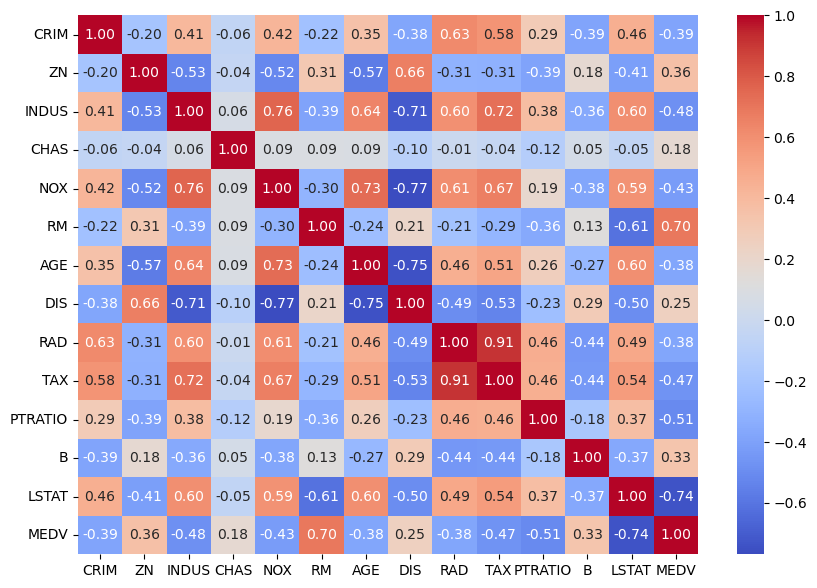

In [7]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(), annot=True,fmt=".2f", cmap='coolwarm')

**Como ya observamos este dataframe en el ejercicio anterior a través de diferentes visualizaciones y explicaciones sobre las correlaciones entre las variables.
Luego las variables seran estandarizadas de diferente manera según si tienen o no outliers o si son categoricas. Recordamos la clasificación:**

In [8]:

#Variables con outliers
columnas_con_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


#Variables sin outliers
columnas_sin_outliers = ['INDUS', 'NOX','AGE', 'TAX']

#Variables categoricas
'CHAS', 'RAD'

('CHAS', 'RAD')

# Estandarización de los datos 

In [10]:
from sklearn.preprocessing import RobustScaler

columnas_con_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

scaler = RobustScaler()

df[columnas_con_outliers] = scaler.fit_transform(df[columnas_con_outliers])

In [11]:
from sklearn.preprocessing import MinMaxScaler

columnas_sin_outliers = ['INDUS', 'NOX','AGE', 'TAX']

scaler_MinMax = MinMaxScaler()

df[columnas_sin_outliers] = scaler_MinMax.fit_transform(df[columnas_sin_outliers])

In [12]:
# Crear columna dummy de columna 'RAD'
column_dummies = pd.get_dummies(df['RAD'], prefix='RAD')

# Concatenar las columnas dummy al DataFrame original
df = pd.concat([df, column_dummies], axis=1)

#Se elimina la columna original y una dummie
df.drop(['RAD','RAD_1'], axis=1, inplace=True)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,-0.637681,0.351097,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,-0.221889,0.050157,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,-0.732634,1.692790,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,-0.841579,1.529781,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,-0.602699,1.880878,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,...,-0.168916,0.150470,0,0,0,0,0,0,0,0
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,...,-0.227886,-0.075235,0,0,0,0,0,0,0,0
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,...,-0.571714,0.338558,0,0,0,0,0,0,0,0
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,...,-0.487756,0.100313,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  RAD_2    506 non-null    uint8  
 14  RAD_3    506 non-null    uint8  
 15  RAD_4    506 non-null    uint8  
 16  RAD_5    506 non-null    uint8  
 17  RAD_6    506 non-null    uint8  
 18  RAD_7    506 non-null    uint8  
 19  RAD_8    506 non-null    uint8  
 20  RAD_24   506 non-null    uint8  
dtypes: float64(12), 

In [14]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.934,2.393,-0.070,-0.049,-0.000,0.951,24.678
ZN,506.0,0.909,1.866,0.000,0.000,0.000,1.000,8.000
INDUS,506.0,0.391,0.251,0.000,0.173,0.338,0.647,1.000
CHAS,506.0,0.069,0.254,0.000,0.000,0.000,0.000,1.000
NOX,506.0,0.349,0.238,0.000,0.132,0.315,0.492,1.000
RM,506.0,0.103,0.952,-3.587,-0.438,0.000,0.562,3.484
AGE,506.0,0.676,0.290,0.000,0.434,0.768,0.939,1.000
DIS,506.0,0.190,0.682,-0.673,-0.359,0.000,0.641,2.888
TAX,506.0,0.422,0.322,0.000,0.176,0.273,0.914,1.000
PTRATIO,506.0,-0.212,0.773,-2.304,-0.589,0.000,0.411,1.054


Una vez estandarizados los datos, ahora se crearan los modelos de regresión para predecir el precio de las viviendas. Para ello primeramente separaremos en train y test.

In [15]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
477,4.107576,0.0,0.646628,0,0.471193,-1.225610,0.972194,-0.358374,0.914122,0.410714,-2.012711,1.354323,0,0,0,0,0,0,0,1
15,0.103164,0.0,0.281525,0,0.314815,-0.507453,0.552008,0.418085,0.229008,0.696429,0.200504,-0.288856,0,0,1,0,0,0,0,0
332,-0.061710,2.8,0.205279,0,0.108848,-0.240515,0.210093,1.111714,0.223282,-0.767857,-1.400168,-0.352824,0,0,0,0,0,0,0,0
423,1.889802,0.0,0.646628,0,0.471193,-0.142954,0.846550,-0.383923,0.914122,0.410714,-18.655474,1.192404,0,0,0,0,0,0,0,1
19,0.130538,0.0,0.281525,0,0.314815,-0.652439,0.685891,0.190739,0.229008,0.696429,-0.023504,-0.007996,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.023730,0.0,0.296921,0,0.277778,-0.504743,0.916581,-0.322658,0.375954,0.660714,0.202902,0.729635,0,0,0,1,0,0,0,0
270,0.011864,1.6,0.238270,0,0.162551,-0.477642,0.403708,0.395548,0.068702,-0.160714,-0.133829,0.163918,0,1,0,0,0,0,0,0
348,-0.067176,6.4,0.056818,0,0.102881,0.577913,0.276004,1.663256,0.177481,-0.732143,-0.023984,-0.536732,0,0,1,0,0,0,0,0
435,3.033039,0.0,0.646628,0,0.730453,0.569783,0.944387,-0.350603,0.914122,0.410714,-13.507135,1.190405,0,0,0,0,0,0,0,1


In [16]:
# Inicializamos el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
predictions_lr = model_lr.predict(X_test)

# Evaluamos el rendimiento
mse_lr = mean_squared_error(y_test, predictions_lr).round(2)
print(f'MSE (Regresión Lineal Múltiple): {mse_lr}')

MSE (Regresión Lineal Múltiple): 0.39


El modelo se entrena utilizando el conjunto de entrenamiento (X_train, y_train). 
Durante el entrenamiento, el modelo aprende patrones y relaciones en los datos para realizar predicciones precisas. Se utilizan las características del conjunto de prueba (X_test) para hacer predicciones utilizando el modelo entrenado. 
Se evalúa el rendimiento del modelo calculando el error cuadrático medio (MSE) entre las predicciones (predictions_lr) y las etiquetas reales del conjunto de prueba (y_test). 
El **MSE** proporciona una medida de cuán bien el modelo se ajusta a los datos; cuanto menor sea el MSE, mejor será el rendimiento del modelo. Esto se aplica a todos y cada uno de los modelos.

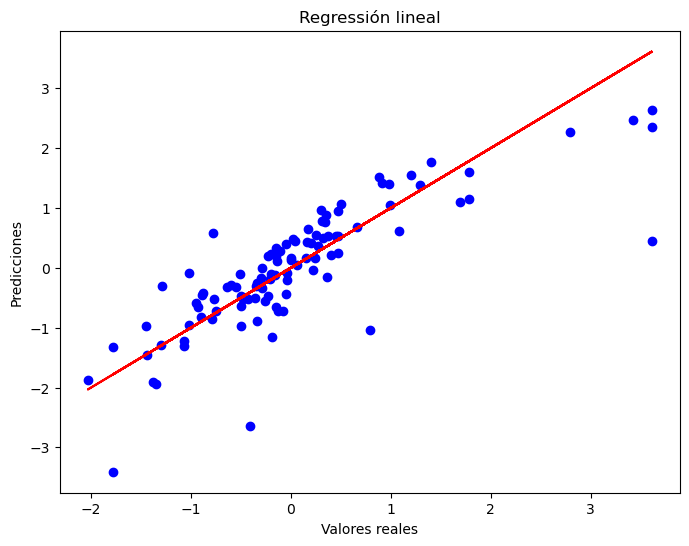

In [18]:
# Visualitzación del modelo

plt.figure(figsize=(8, 6))

plt.scatter(y_test, predictions_lr, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regressión lineal');

El gráfico de dispersión junto con la línea de referencia ayuda a visualizar cómo se comparan las predicciones del modelo con los valores reales. Idealmente, los puntos deberían seguir la línea de referencia, lo que indicaría que las predicciones son cercanas a los valores reales. Este tipo de visualización es útil para poder evaluar el rendimiento y la precisión del modelo de regresión lineal.
En esta primera representación se crea un gráfico de dispersión donde el eje x representa los valores reales (y_test) y el eje y representa las predicciones del modelo de regresión lineal (predictions_lr). Cada punto en el gráfico corresponde a una instancia del conjunto de prueba.
Se puede observar que los valores son parecidos entre predicciones y valores reales aunque muestran algunos valores dispersos. Veamos otros modelos...


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Inicializamos y entrenamos el modelo de regresión de RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
predictions_rf = model_rf.predict(X_test)

# Evaluamos el rendimiento
mse_rf = mean_squared_error(y_test, predictions_rf).round(2)
print(f'MSE (Random Forest Regressor): {mse_rf}')

MSE (Random Forest Regressor): 0.14


Se utilizan las características del conjunto de prueba (X_test) para hacer predicciones utilizando el modelo de regresión de RandomForestRegressor.

Se evalúa el rendimiento del modelo calculando el error cuadrático medio (MSE) entre las predicciones (predictions_rf) y las etiquetas reales del conjunto de prueba (y_test).

El MSE proporciona una medida de cuán bien el modelo se ajusta a los datos; cuanto menor sea el MSE, mejor será el rendimiento del modelo.

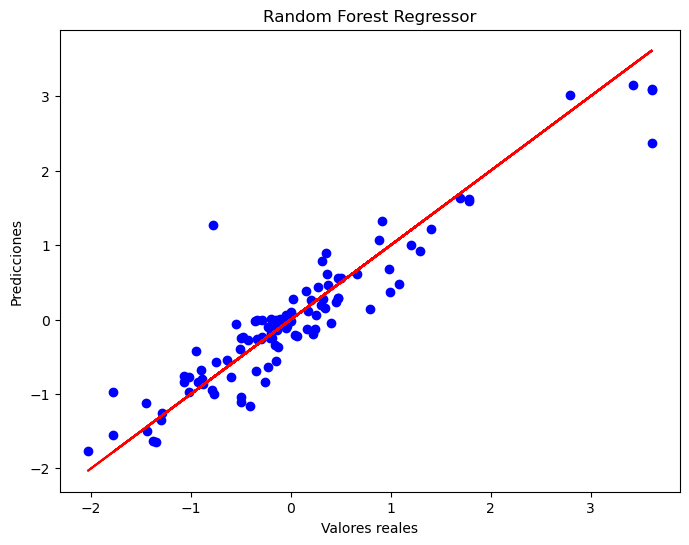

In [20]:
# Visualitzación del modelo

plt.figure(figsize=(8, 6))

plt.scatter(y_test, predictions_rf, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor');

El gráfico de dispersión junto con la línea de referencia ayuda a visualizar cómo se comparan las predicciones del modelo con los valores reales. 
En esta segunda representación se crea un gráfico de dispersión donde el eje x representa los valores reales (y_test) y el eje y representa las predicciones del **modelo Random Forest Regressor (predictions_rf)**. Cada punto en el gráfico corresponde a una instancia del conjunto de prueba.

Se puede observar que los valores se asemejan incluso más entre predicciones y valores reales, en comparación a la visualización anterior.

In [22]:
from sklearn.svm import SVR

# Inicializamos y entrenamos el modelo de SVR
model_svr = SVR(kernel='linear') 
model_svr.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
predictions_svr = model_svr.predict(X_test)

# Evaluamos el rendimiento
mse_svr = mean_squared_error(y_test, predictions_svr).round(2)
print(f'MSE (SVR): {mse_svr}')


MSE (SVR): 0.45


Se utilizan las características del conjunto de prueba (X_test) para hacer predicciones utilizando el modelo de SVR.

Se evalúa el rendimiento del modelo calculando el error cuadrático medio (MSE) entre las predicciones (predictions_svr) y las etiquetas reales del conjunto de prueba (y_test).

El MSE proporciona una medida de cuán bien el modelo se ajusta a los datos; cuanto menor sea el MSE, mejor será el rendimiento del modelo.

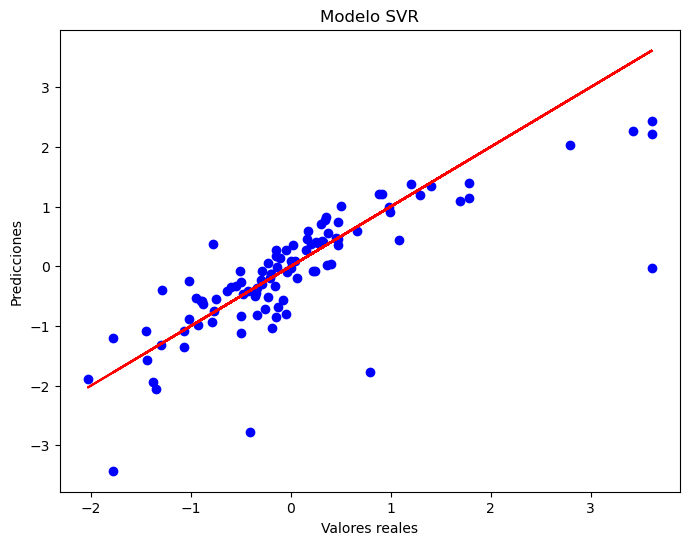

In [23]:
# Visualitzación del modelo

plt.figure(figsize=(8, 6))

plt.scatter(y_test, predictions_svr, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Modelo SVR');

En esta *tercera representación* se crea un gráfico de dispersión donde el eje x representa los valores reales (y_test) y el eje y representa las **predicciones del modelo SVR (predictions_svr)**. Cada punto en el gráfico corresponde a una instancia del conjunto de prueba.

Se puede observar que los valores están más dispersos entre predicciones y valores reales. 

# Exercici 2

-     Compara’ls en base al MSE i al R2.

**MSE (Error Cuadrático Medio):**
El Error Cuadrático Medio (MSE, por sus siglas en inglés) es una métrica que mide el promedio de los cuadrados de los errores entre los valores predichos por el modelo y los valores reales. Un MSE más bajo indica un mejor rendimiento del modelo.

**R2 (Coeficiente de Determinación):**
El Coeficiente de Determinación, o R cuadrado (R2), es una métrica que proporciona una medida de la proporción de la variabilidad en la variable de respuesta que es explicada por el modelo. El valor de R2 varía entre 0 y 1, donde 0 indica que el modelo no explica la variabilidad de la variable de respuesta, y 1 indica una explicación perfecta. R2 también puede ser negativo si el modelo es peor que simplemente usar la media de los valores reales.

    


In [80]:
from sklearn.metrics import mean_squared_error, r2_score

modelos = ['Regresión Lineal', 'Random Forest', 'Modelo SVR']
predicciones = [predictions_lr, predictions_rf, predictions_svr]

r2_resultados = []
mse_resultados = []


for modelo, prediccion in zip(modelos, predicciones):

    r2 = r2_score(y_test, prediccion).round(2)
    mse = mean_squared_error(y_test, prediccion).round(2)

    r2_resultados.append(r2)
    mse_resultados.append(mse)

comparacion = pd.DataFrame({'Modelo': modelos, 'R2': r2_resultados, 'MSE': mse_resultados})

comparacion

,Modelo,R2,MSE
0,Regresión Lineal,0.66,0.39
1,Random Forest,0.88,0.14
2,Modelo SVR,0.61,0.45


La interpretación del R2 seria que un R2 más alto generalmente indica un mejor rendimiento predictivo. En este caso, el modelo de Random Forest parece ser el más eficaz entre los tres modelos evaluados. Con un R2 de 0.88, este indica un buen rendimiento y sugiere que el modelo de Random Forest está capturando eficazmente la complejidad de los datos.
Mientras que el modelo SVR explica aproximadamente el 0.61 de la variabilidad en la variable de respuesta. Siendo un rendimiento decente. Y por último, la Regresión Lineal obtiene rendimiento moderado, lo que significa que el modelo puede capturar una proporción significativa de la variabilidad en los datos, pero aún hay margen para mejorar.
La interpretación del MSE seria que cuanto menor sea el MSE mejor será el rendimiento del modelo. En este caso Random Forest tiene el valor más bajo de MSE con 0.14 teniendo el mejor rendimiento. Seguido por Regresión Lineal con 0.39 y finalmente el SVR con 0.45 sugiriendo un rendimiento inferior en comparación con los otros modelos.

En conclusión, comparando el MSE y el R2, el modelo que mejores rendimientos ofrece sería RANDOM FOREST.

# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Para intentar mejorar la predicción se hace uso de GridSearchCV. Esta técnica de scikit learn tiene como objetivo encontrar la combinación de hiperparámetros que mejoren el rendimiento del modelo. Al ajustar estos hiperparámetros, se busca mejorar el rendimiento del modelo en términos de predicciones más precisas. Es una técnica eficiente para explorar un espacio de búsqueda de hiperparámetros evaluando todas las posibilidades y combinaciones posibles. Una vez se obtienen los hiperparámetros más adecuados para obtener un modelo con la mayor precisión posible, se aplican dichos parámetros.

In [26]:
from sklearn.model_selection import GridSearchCV

#parámetros de Regresión Lineal
param = {'fit_intercept': [True, False],
         'positive' : [True, False],
         'copy_X' : [True, False]}

lr = LinearRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

#Aplicar los mejores parámetros en el modelo
best_param = grid_search.best_params_

best_model_lr = grid_search.best_estimator_
y_pred_best_model_lr = best_model_lr.predict(X_test)

mse_best_model_lr = mean_squared_error(y_test, y_pred_best_model_lr).round(3)
r2_best_model_lr = r2_score(y_test, y_pred_best_model_lr).round(3)

print(f'Mejores parámetros de Regresión Lineal: {best_param}')
print(f'MSE mejorado: {mse_best_model_lr}')
print(f'R2 mejorado: {r2_best_model_lr}')

Mejores parámetros de Regresión Lineal: {'copy_X': True, 'fit_intercept': True, 'positive': False}
MSE mejorado: 0.39
R2 mejorado: 0.662


In [61]:

#parámetros de Random Forest
param = {'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20, 30], 
          'min_samples_split': [2, 5, 10]
}
    
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_

#Aplicar los mejores parámetros en el modelo
best_model_rf = grid_search.best_estimator_
y_pred_best_model_rf = best_model_rf.predict(X_test)

mse_best_model_rf = mean_squared_error(y_test, y_pred_best_model_rf).round(3)
r2_best_model_rf = r2_score(y_test, y_pred_best_model_rf).round(3)

print(f'Mejores parámetros de Random Forest: {best_param}')
print(f'MSE mejorado: {mse_best_model_rf}')
print(f'R2 mejorado: {r2_best_model_rf}')

Mejores parámetros de Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MSE mejorado: 0.138
R2 mejorado: 0.881


In [28]:
#parámetros de SVR
param = {'C': [0.1, 1, 10, 100],
         'epsilon': [0.01, 0.1, 0.5, 1],
         'kernel': ['linear', 'rbf']}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_

#Aplicar los mejores parámetros en el modelo
best_model_svr = grid_search.best_estimator_
y_pred_best_model_svr = best_model_svr.predict(X_test)

mse_best_model_svr = mean_squared_error(y_test, y_pred_best_model_svr).round(3)
r2_best_model_svr = r2_score(y_test, y_pred_best_model_svr).round(3)

print(f'Mejores parámetros de SVR: {best_param}')
print(f'MSE mejorado: {mse_best_model_svr}')
print(f'R2 mejorado: {r2_best_model_svr}')

Mejores parámetros de SVR: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
MSE mejorado: 0.193
R2 mejorado: 0.832


In [109]:

r2_mejorado = [r2_best_model_lr, r2_best_model_rf, r2_best_model_svr]
mse_mejorado = [mse_best_model_lr, mse_best_model_rf, mse_best_model_svr]

for modelo, r2 ,mse in zip(modelos, r2_mejorado, mse_mejorado):
    comparacion.loc[comparacion['Modelo'] == modelo, 'MSE_m'] = mse
    comparacion.loc[comparacion['Modelo'] == modelo, 'R2_m'] = r2

comparacion['MSE_m'] = comparacion['MSE_m'].round(2)
comparacion['R2_m'] = comparacion['R2_m'].round(2)

comparacion = comparacion[['Modelo', 'R2', 'R2_m', 'MSE', 'MSE_m']]
comparacion

,Modelo,R2,R2_m,MSE,MSE_m
0,Regresión Lineal,0.66,0.66,0.39,0.39
1,Random Forest,0.88,0.88,0.14,0.14
2,Modelo SVR,0.61,0.83,0.45,0.19


Una vez aplicados los mejores parámetros en los 3 modelos que hemos usado, se añade en el dataframe creado anteriormente para ver si han cambiado los valores de MSE y R2 que teníamos del ejercicio anterior sin usar GridSearchCV y aplicar los parámetros que mejor se ajustaban a nuestro objetivo.  

En este caso se observa que tanto el modelo de Regresión Lineal como el Random Forest no han cambiado demasiado, indicando que los parámetros predeterminados ya eran los adecuados.
Donde si ha tenido un impacto substancial es en el modelo SVR, mejorando en términos de precisión del modelo después de aplicar los ajustes. Obteniendo un MSE de 0.45 --> 0.19 y un R2 de 0.61 --> 0.83.


#  Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


Cross-validation es un procedimiento estadístico utilizado para estimar el rendimiento de un modelo de manera más robusta y fiable que únciamente dividir los datos en conjuntos de train y test. Consiste en dividir el conjunto de datos en múltiples particiones y realizar el proceso de entrenamiento y evaluación varias veces.

En primer lugar, se establece una muestra o conjunto de datos primaria que se divide, de forma aleatoria, en distintos subconjuntos de datos (cv=5). De esta manera, el cross-validation se trabaja en todos los subconjuntos, dejando uno. En la última parte, se realizan las predicciones sobre el conjunto que se dejó. También es un procedimiento que evita overfitting o underfitting, aprovecha al máximo los datos disponibles ya que se utilizan tanto en el train como en el test y proporciona una estimación más fiable. 

Por todo ello, el cross-validation es una práctica esencial para garantizar que el modelo generado tenga un buen rendimiento en diversos conjuntos de datos. Al evaluar el modelo en múltiples particiones se tiene una comprensión más completa de la capacidad para generalizar y prevenir la sobreoptimización o el sobreajuste.


In [99]:
from sklearn.model_selection import cross_val_score

# Definir los hipermarámetros del ejercicio anterior
modelos_param = [
    ('Regresión Lineal', LinearRegression(copy_X=True, fit_intercept=True, positive=False)),
    ('Random Forest', RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=200)),
    ('Modelo SVR', SVR(C=100, epsilon=0.1, kernel='rbf'))
]

modelos = []
medianas_r2 = []
stds_r2 = []

# Iterar sobre modelos
for nombre, modelo in modelos_param:
    scores_r2 = cross_val_score(modelo, X, y, cv=5, scoring='r2').round(3)
    mediana_r2 = scores_r2.mean().round(3)
    std_r2 = scores_r2.std().round(3)
    
    modelos.append(nombre)
    medianas_r2.append(mediana_r2)
    stds_r2.append(std_r2)


resultados = pd.DataFrame({'Modelo': modelos, 'Mediana R2': medianas_r2, 'Desviación Estándar R2': stds_r2})

resultados

,Modelo,Mediana R2,Desviación Estándar R2
0,Regresión Lineal,0.325,0.411
1,Random Forest,0.618,0.214
2,Modelo SVR,0.249,0.873


Se realiza un cálculo de la Mediana de r2 y la desviación estándard utilizando el método de cross-validation para estimar el rendimiento de los 3 modelos que se han ido evaluando anteriormente. Observando los datos, se detecta que el modelo Random Forest tiene la más alta mediana r2 y una desviación estándar más baja, indicando un mejor rendimiento general y una menor variabilidad en la calidad del ajuste entre las particiones de la cross-validation.

In [122]:
from sklearn.model_selection import cross_val_score

# Definir los hipermarámetros del ejercicio anterior
modelos_param = [
    ('Regresión Lineal', LinearRegression(copy_X=True, fit_intercept=True, positive=False)),
    ('Random Forest', RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=200)),
    ('Modelo SVR', SVR(C=100, epsilon=0.1, kernel='rbf'))
]

modelos = []
medianas_r2 = []
mse_medio = []

# Iterar sobre modelos
for nombre, modelo in modelos_param:
    scores_r2 = cross_val_score(modelo, X, y, cv=5, scoring='r2').round(2)
    scores_mse = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error').round(2)
    
    r2_mediana = scores_r2.mean().round(2)
    mse_medio_actual = -scores_mse.mean().round(2)  # Se toma el negativo para convertir a positivo
    
    modelos.append(nombre)
    medianas_r2.append(r2_mediana)
    mse_medio.append(mse_medio_actual)

    print(scores_r2)
    print(scores_mse)


comparacion['R2_cv'] = medianas_r2
comparacion['MSE_cv'] = mse_medio


comparacion

[ 0.61  0.74  0.55  0.08 -0.36]
[-0.21 -0.37 -0.56 -1.27 -0.57]
[0.77 0.87 0.75 0.47 0.23]
[-0.12 -0.2  -0.35 -0.73 -0.31]
[ 0.67  0.85  0.81  0.38 -1.47]
[-0.18 -0.22 -0.24 -0.85 -1.03]


,Modelo,R2,R2_m,MSE,MSE_m,R2_cv,MSE_cv
0,Regresión Lineal,0.66,0.66,0.39,0.39,0.32,0.60
1,Random Forest,0.88,0.88,0.14,0.14,0.62,0.34
2,Modelo SVR,0.61,0.83,0.45,0.19,0.25,0.50


La función cross_val_score utiliza un subconjunto de 5 datos, por lo tanto para poder comparar-los se realiza el promedio de los datos. Se observa como la predicción es débil, mostrando valores negativos o muy bajos implica que el rendimiento es pésimo. En las primeras particiones todavía se mantiene, pero conforme en las finales  


En scikit-learn, la función cross_val_score utiliza una métrica de evaluación para optimización donde valores más altos indican un mejor rendimiento del modelo. Por lo tanto, al utilizar 'neg_mean_squared_error', se busca maximizar el valor negativo del MSE. Esto es útil porque la función de optimización en scikit-learn busca maximizar la métrica de evaluación proporcionada. En cambio, utilizando MSE, la optimización buscaría minimizar su valos.
Entonces, al tomar el negativo,  se esta alineando la convención de scikit-learn con la intuición común, donde un valor más alto de MSE indica un peor rendimiento del modelo. Esto no cambia el significado del MSE, solo ajusta la convención para que sea coherente con la expectativa de que valores más altos indican un mejor rendimiento.


En conclusión, valores más altos de R2  indican un mejor ajuste del modelo a los datos, mientras que valores más bajos de MSE indican predicciones más precisas. Por lo tanto, si evaluamos el procedimiento de cross-validation comparando el R2 y el MSE de todos los modelos y resultados anteriores. Se detecta un deterioro en su desarrollo al utilizar la validación cruzada. Aunque, teniendo en cuenta el resultado del cross-validation, se muestra la eficacia del modelo Random Forest en comparación de los otros dos. 

# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Ahora el ejercicio pide no hacer uso de la variable RM, así que se podrá medir la notoriedad de la variable a la hora de hacer predicciones en términos de precisión.
Como ya resolvimos que el modelo Random Forest era el que mejor se ajustaba, lo utilizaremos a la hora de hacer predicciones. 

In [131]:
X_train_RM = X_train.drop('RM', axis=1)
X_test_RM = X_test.drop('RM', axis=1)

In [144]:
# Inicializamos y entrenamos el modelo de regresión de RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_RM, y_train)

# Realizamos predicciones en el conjunto de prueba
predictions = model_rf.predict(X_test_RM)

# Evaluamos el rendimiento
mse_rm = mean_squared_error(y_test, predictions).round(2)
r2_rm = r2_score(y_test, predictions).round(2)

print(f'MSE (Random Forest Regressor sin RM): {mse_rm}')
print(f'R2 (Random Forest Regressor sin RM): {r2_rm}')

MSE (Random Forest Regressor sin RM): 0.22
R2 (Random Forest Regressor sin RM): 0.81


Si se elimina la variable con mayor correlación los resultados son menos precisos. Por lo tanto se puede concluir que el impacto de la variable RM es alto en el modelo de predicción.
 - el MSE pasa de 0.14 --> 0.22
 - el R2 pasa de 0.88 --> 0.81
  
Mostrando como el modelo de predicción reduce su eficacia.

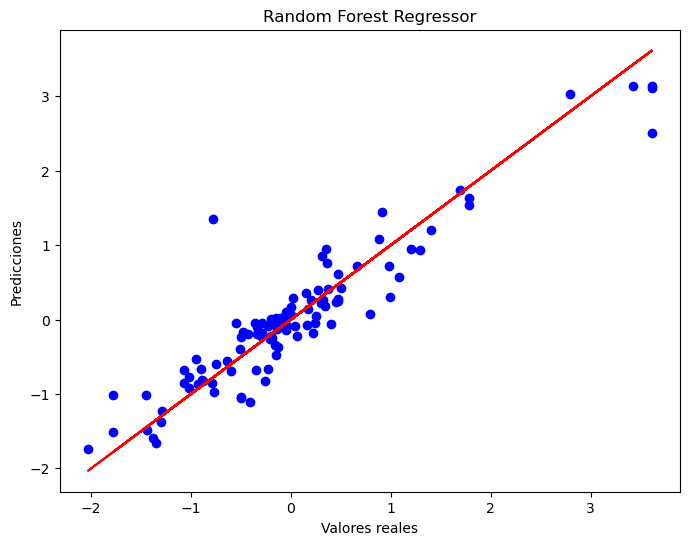

In [125]:
# Visualitzación del modelo

plt.figure(figsize=(8, 6))

plt.scatter(y_test, predictions_rf, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor');

En la visualización también se pueden detectar que hay valores reales que se alejan de la predicción. Dicha dispersión implica un rendimiento menor en el modelo. En conclusión, la disminución de datos y la reducción de la correlación de las variables hace que el modelo reduzca su precisión.